In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'D:\DSBDA\DSBDA Mini Project datasets\Datasets\2.tweet analyis\tweets\data_analysis.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39116 non-null  int64  
 1   conversation_id  39116 non-null  int64  
 2   created_at       39116 non-null  object 
 3   date             39116 non-null  object 
 4   time             39116 non-null  object 
 5   timezone         39116 non-null  int64  
 6   user_id          39116 non-null  int64  
 7   username         39116 non-null  object 
 8   name             39116 non-null  object 
 9   place            92 non-null     object 
 10  tweet            39116 non-null  object 
 11  language         39116 non-null  object 
 12  mentions         39116 non-null  object 
 13  urls             39116 non-null  object 
 14  photos           39116 non-null  object 
 15  replies_count    39116 non-null  int64  
 16  retweets_count   39116 non-null  int64  
 17  likes_count 

In [6]:
def remove_pattern(input_txt,pattern):
    r =re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i, "",input_txt)
    return input_txt

In [7]:
df['clean_tweet']= np.vectorize(remove_pattern)(df['tweet'],"@[\w]")

In [8]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Join PJ_IC at 6 p.m. EDT Tuesday for the next ...
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"READ: Resilience, hard work, and perseverance ..."
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,How will the shift to streaming impact movie-m...
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,(2/2) to gain the aptitude to find better solu...
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Alexander Lukashenko is still in power in Bela...


In [9]:
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [10]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Join PJ IC at p m EDT Tuesday for the next ...
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,READ Resilience hard work and perseverance ...
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,How will the shift to streaming impact movie m...
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,to gain the aptitude to find better solu...
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Alexander Lukashenko is still in power in Bela...


In [11]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Join, PJ, IC, at, p, m, EDT, Tuesday, for, th...
1    [READ, Resilience, hard, work, and, perseveran...
2    [How, will, the, shift, to, streaming, impact,...
3    [to, gain, the, aptitude, to, find, better, so...
4    [Alexander, Lukashenko, is, still, in, power, ...
Name: clean_tweet, dtype: object

In [12]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [join, pj, ic, at, p, m, edt, tuesday, for, th...
1    [read, resili, hard, work, and, persever, paid...
2    [how, will, the, shift, to, stream, impact, mo...
3    [to, gain, the, aptitud, to, find, better, sol...
4    [alexand, lukashenko, is, still, in, power, in...
Name: clean_tweet, dtype: object

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

df['clean_tweet']=tokenized_tweet
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,join pj ic at p m edt tuesday for the next #ic...
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,read resili hard work and persever paid off fo...
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,how will the shift to stream impact movi make ...
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,to gain the aptitud to find better solut to re...
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,alexand lukashenko is still in power in belaru...


In [14]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


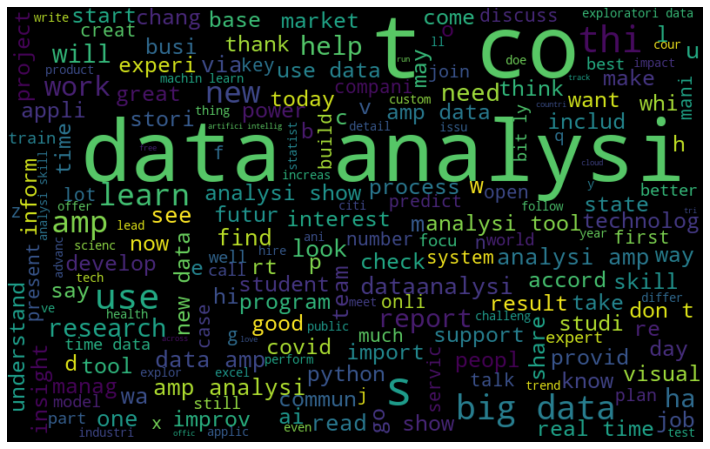

In [15]:
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

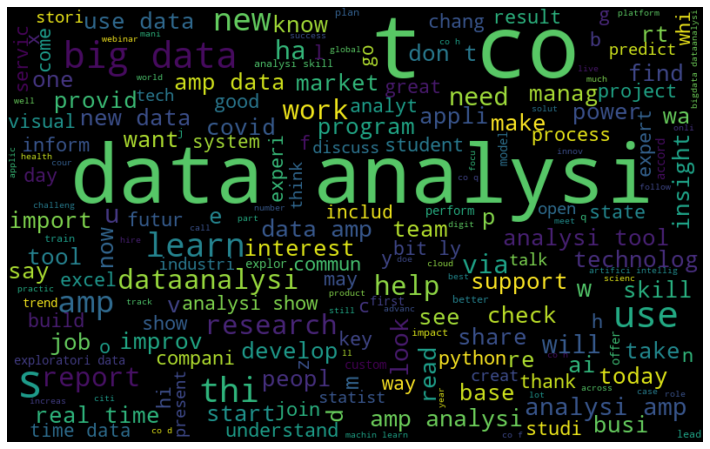

In [16]:
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['replies_count']==0]])


wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

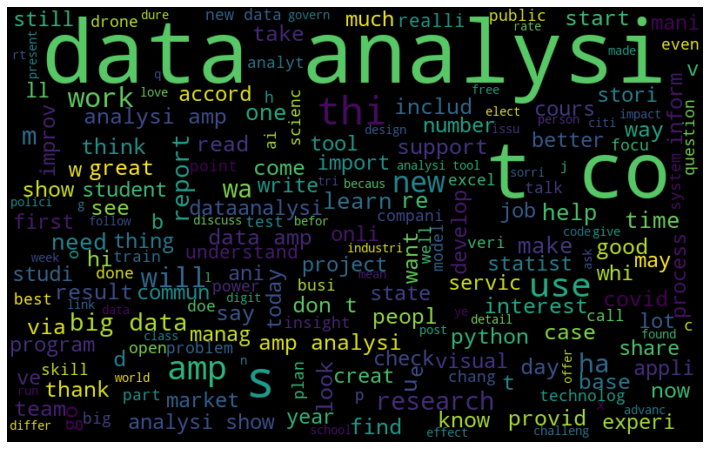

In [17]:
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['replies_count']==1]])


wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
def hashtag_extract(tweet):
    hashtags =[]
    for word in tweet:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [19]:
ht_positive=hashtag_extract(df['clean_tweet'][df['tweet']==0])

ht_negative=hashtag_extract(df['clean_tweet'][df['tweet']==1])

In [20]:
ht_positive[:5]

[]

In [22]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [23]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Hashtag,Count


In [ ]:
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()